In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Qiskit-SuperstaQ Pulse Manipulator Example

In [3]:
import qiskit_superstaq as qss
import qiskit
import os

In [4]:
if not qiskit.IBMQ.active_account():
    qiskit.IBMQ.enable_account(os.environ["IBMQ_TOKEN"])

In [5]:
provider = qiskit.IBMQ.get_provider(hub="ibm-q-startup", group="super-tech-labs", project="default")
lagos = provider.get_backend("ibm_lagos")

In [6]:
ism = lagos.defaults().instruction_schedule_map

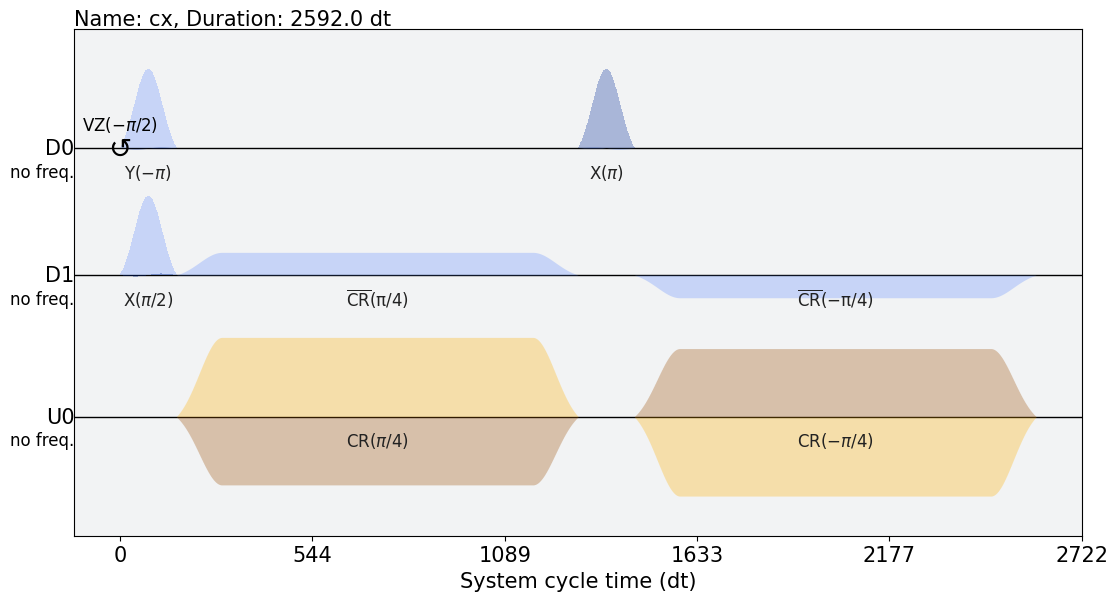

In [9]:
cx_schedule = ism.get("cx", (0, 1))
cx_schedule.draw()

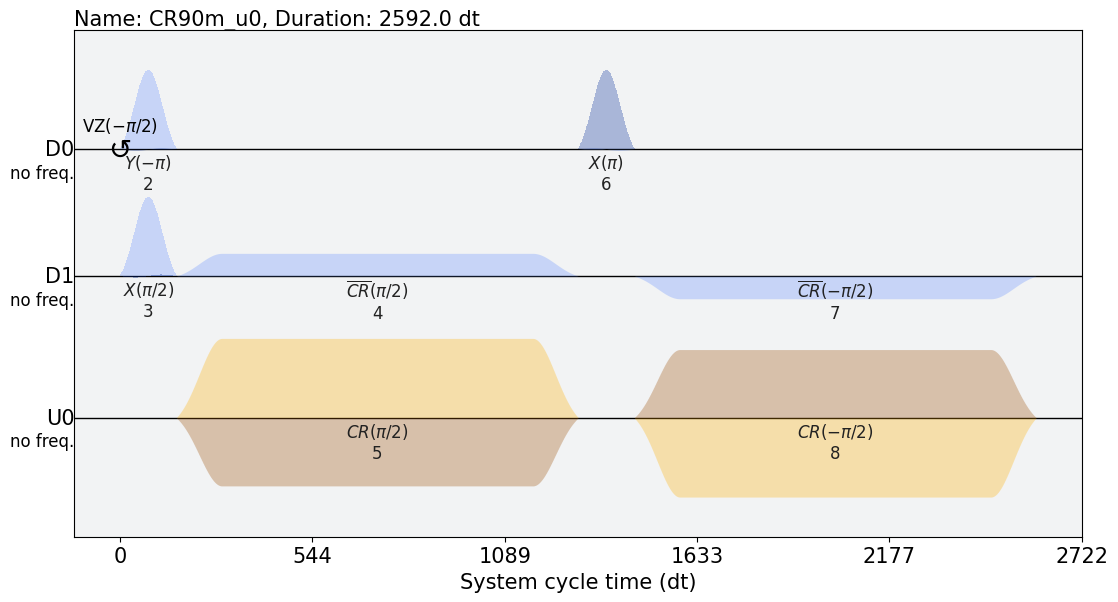

In [58]:
cx_pm = qss.PulseManipulator(cx_schedule, lagos)
cx_pm.draw()

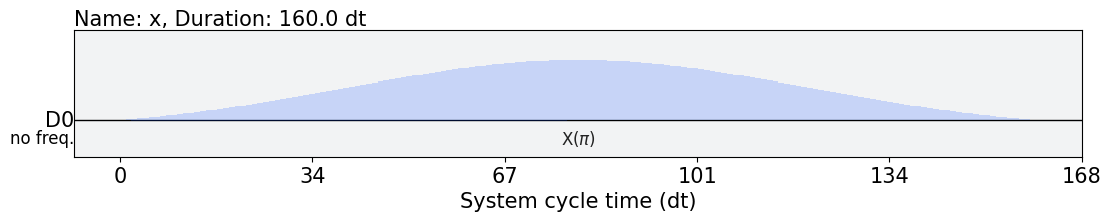

In [31]:
inst = ism.get("x", 0)
inst.draw()

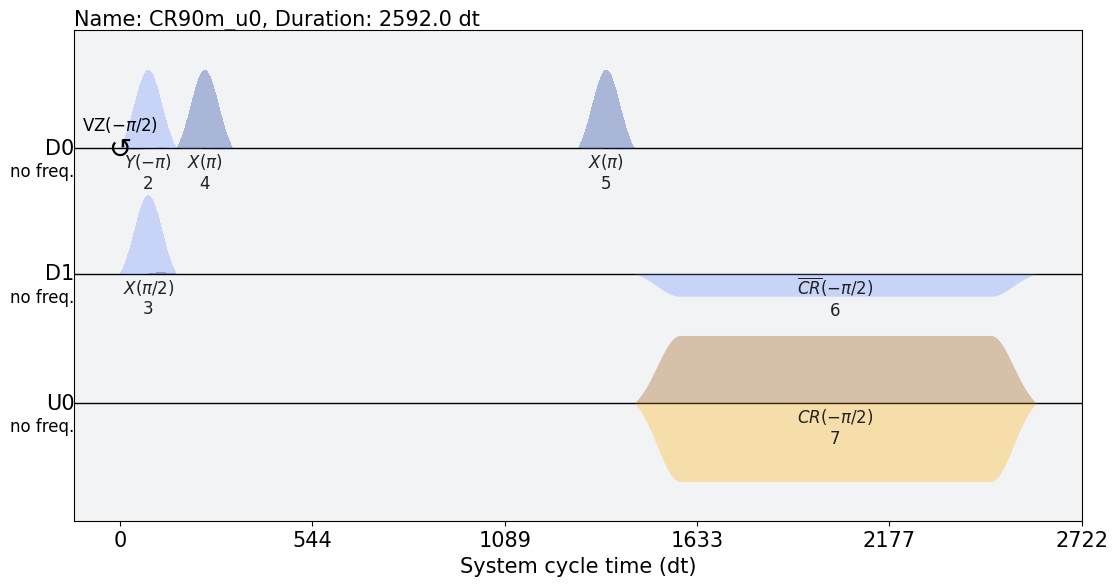

In [60]:
cx_pm.replace(inst_id=5, instruction=inst).draw()